# Cli aliases

<ul> <li><b>ForAI</b> - Activates the Python virtual environment (`ForAI`).</li> <li><b>android-studio</b> - Launches Android Studio.</li> <li><b>pong</b> - Checks Redis status, uptime, memory usage, and connected clients.</li> <li><b>start_pong</b> - Starts the Redis server.</li> <li><b>end_pong</b> - Stops the Redis server.</li> <li><b>restart_pg</b> - Restarts the PostgreSQL database.</li> <li><b>start_pg</b> - Starts PostgreSQL and opens `pgAdmin4` in a browser.</li> <li><b>stop_pg</b> - Stops the PostgreSQL database.</li> <li><b>start_mongo</b> - Starts the MongoDB database.</li> <li><b>stop_mongo</b> - Stops the MongoDB database.</li> <li><b>mysql</b> - Opens MySQL as the root user (no password prompt).</li> <li><b>mysqlp</b> - Opens MySQL as the root user (asks for a password).</li> <li><b>php</b> - Runs PHP using the XAMPP installation.</li> <li><b>restart</b> - Restarts the XAMPP Apache and MySQL servers.</li> <li><b>start</b> - Stops Apache2 and starts XAMPP services.</li> <li><b>stop</b> - Stops XAMPP services.</li> <li><b>status</b> - Checks the status of XAMPP services.</li> <li><b>htdocs</b> - Changes directory to XAMPP’s `htdocs` folder.</li> <li><b>tl</b> - Opens Telegram from its installation directory.</li> <li><b>tor</b> - Opens the Tor browser.</li> </ul> 

# Image analysis

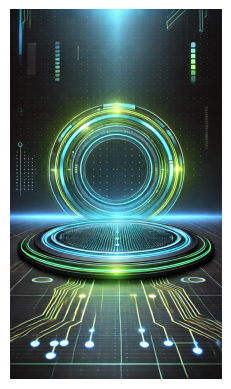

In [10]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(r"/home/zkllmt/Downloads/ba.webp")
plt.imshow(img[:, :, ::-1])
plt.axis("off")
plt.savefig("background.jpg")
plt.show()

# MongoDB

In [1]:
from datetime import datetime
from motor.motor_asyncio import AsyncIOMotorClient

MONGO_URI = "mongodb://localhost:27017"
DB_NAME = "PerceptronX"
COLLECTION_NAME = "annotations"

client = AsyncIOMotorClient(MONGO_URI)
db = client[DB_NAME]
collection = db[COLLECTION_NAME]

async def insert_annotation(user_id: int, image: str, annotations: list, 
                            size: dict, save_location: str, model_used: str, 
                            confidence_threshold: float, processing_time: float, device: str):
    """
    Inserts an AI detection annotation into MongoDB.
    """
    annotation_data = {
        "user_id": user_id,
        "image": image,
        "annotations": [
            {"class": ann["class"], "confidence": ann["confidence"], "bbox": ann["bbox"]}
            for ann in annotations
        ],
        "size": size,
        "save_location": save_location,
        "model_used": model_used,
        "timestamp": datetime.utcnow(),
        "status": "completed",
        "confidence_threshold": confidence_threshold,
        "processing_time": processing_time,
        "device": device,
    }

    result = await collection.insert_one(annotation_data)
    return {"inserted_id": str(result.inserted_id)}

In [25]:
from pymongo import MongoClient

def get_Mongo_db(collection_name):
    MONGO_URI = "mongodb://localhost:27017"
    DB_NAME = "PerceptronX"
    COLLECTION_NAME = collection_name

    client = MongoClient(MONGO_URI)
    db = client[DB_NAME]
    collection = db[COLLECTION_NAME]
    return collection

collection = get_Mongo_db("annotations")
res = collection.find()
[i for i in res]

[{'_id': ObjectId('67ebaffa7d513027012c98b6'),
  'user_id': 1,
  'image': 'perceptronx_detection.png',
  'annotations': [{'class': 'car',
    'confidence': 0.95,
    'bbox': [120, 230, 400, 500]},
   {'class': 'person', 'confidence': 0.88, 'bbox': [50, 100, 200, 350]}],
  'size': {'height': 1340, 'width': 850},
  'save_location': '/home/zkllmt/PerceptronX/Images',
  'model_used': 'YOLOv8',
  'timestamp': datetime.datetime(2025, 4, 1, 9, 20, 58, 35000),
  'status': 'completed',
  'confidence_threshold': 0.7,
  'processing_time': 0.45,
  'device': 'NVIDIA RTX 3060'},
 {'_id': ObjectId('67ebd9f6f20c3b0fa91a834f'),
  'user_id': 1,
  'image': 'perceptronx_detection.png',
  'annotations': [{'class': 'car',
    'confidence': 0.95,
    'bbox': [120, 230, 400, 500]},
   {'class': 'person', 'confidence': 0.88, 'bbox': [50, 100, 200, 350]}],
  'size': {'height': 1340, 'width': 850},
  'save_location': '/home/zkllmt/PerceptronX/Images',
  'model_used': 'YOLOv8',
  'timestamp': datetime.datetime(20

In [4]:
import nest_asyncio
import asyncio

nest_asyncio.apply()

async def main():
    result = await insert_annotation(
        user_id=1,
        image="perceptronx_detection.png",
        annotations=[
            {"class": "car", "confidence": 0.95, "bbox": [120, 230, 400, 500]},
            {"class": "person", "confidence": 0.88, "bbox": [50, 100, 200, 350]},
        ],
        size={"height": 1340, "width": 850},
        save_location="/home/zkllmt/PerceptronX/Images",
        model_used="YOLOv8",
        confidence_threshold=0.7,
        processing_time=0.45,
        device="NVIDIA RTX 3060"
    )
    print(result)

main()



<coroutine object main at 0x7f5f5c2fe350>

# Redis

## Redis Commands

<ul>
<li><b><u>start_pong</u></b> - Starts the Redis server.</li>
<li><b><u>redis-cli</u></b> - To perform some things on cli</li>
<li><b><u>pong</u></b> - Displays Redis status, uptime, memory usage, and connected clients.</li>
<li><b><u>end_pong</u></b> -  Stops the Redis server.</li>
<li><b><u>SET my_key "Hello, Redis!"</u></b> - Set a Key-Value Pair</li>
<li><b><u>GET my_key</u></b> - Retrieve the Value</li>
<li><b><u>KEYS *</u></b> - Check All Keys Stored in Redis</li>

</ul>

## Codes

In [5]:
import redis

# Connect to Redis server
redis_client = redis.Redis(host="localhost", port=6379, db=0, decode_responses=True)

# Test setting a key-value pair
redis_client.set("test_key", "Hello, Redis!")

# Retrieve and print the value
value = redis_client.get("test_key")
print(f"Stored value: {value}")

# Verify if key exists
exists = redis_client.exists("test_key")
print(f"Does 'test_key' exist?: {'Yes' if exists else 'No'}")

# Delete the key
redis_client.delete("test_key")

# Check again if it exists
exists_after_delete = redis_client.exists("test_key")
print(f"Does 'test_key' exist after deletion?: {'Yes' if exists_after_delete else 'No'}")

Stored value: Hello, Redis!
Does 'test_key' exist?: Yes
Does 'test_key' exist after deletion?: No
